In [140]:
import pandas as pd
from tabulate import tabulate
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [141]:
# from google.colab import drive
# drive.mount('/content/drive')

In [142]:
df = pd.read_csv('internet_service_churn.csv')

In [143]:
df.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   reamining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB


In [145]:
df.describe()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
count,7.227400e+04,72274.000000,72274.000000,72274.000000,72274.000000,50702.000000,72274.000000,71893.000000,71893.000000,72274.000000,72274.000000
mean,8.463182e+05,0.815259,0.334629,2.450051,18.942483,0.716039,0.274234,43.689911,4.192076,0.207613,0.554141
std,4.891022e+05,0.388090,0.471864,2.034990,13.215386,0.697102,0.816621,63.405963,9.818896,0.997123,0.497064
min,1.500000e+01,0.000000,0.000000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.222165e+05,1.000000,0.000000,0.930000,13.000000,0.000000,0.000000,6.700000,0.500000,0.000000,0.000000
50%,8.477840e+05,1.000000,0.000000,1.980000,19.000000,0.570000,0.000000,27.800000,2.100000,0.000000,1.000000
75%,1.269562e+06,1.000000,1.000000,3.300000,22.000000,1.310000,0.000000,60.500000,4.800000,0.000000,1.000000
max,1.689744e+06,1.000000,1.000000,12.800000,406.000000,2.920000,19.000000,4415.200000,453.300000,7.000000,1.000000


In [146]:
df.duplicated().sum()

np.int64(0)

In [147]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

table = zip(df.columns, missing_values, missing_percentage)
print(tabulate(table, headers=['Feature', 'Missing Values', 'Percentage']))

Feature                        Missing Values    Percentage
---------------------------  ----------------  ------------
id                                          0      0
is_tv_subscriber                            0      0
is_movie_package_subscriber                 0      0
subscription_age                            0      0
bill_avg                                    0      0
reamining_contract                      21572     29.8475
service_failure_count                       0      0
download_avg                              381      0.527161
upload_avg                                381      0.527161
download_over_limit                         0      0
churn                                       0      0


In [148]:
null_reamining = df[df['reamining_contract'].isnull()]
count_churn_0 = null_reamining[null_reamining['churn'] == 0].shape[0]
count_churn_1 = null_reamining[null_reamining['churn'] == 1].shape[0]

print(f"Jumlah null pada 'reamining_contract' dengan churn=0: {count_churn_0}")
print(f"Jumlah null pada 'reamining_contract' dengan churn=1: {count_churn_1}")

Jumlah null pada 'reamining_contract' dengan churn=0: 1853
Jumlah null pada 'reamining_contract' dengan churn=1: 19719


In [149]:
df['reamining_contract'].fillna(0, inplace=True)

In [150]:
df.dropna(subset=['download_avg'], inplace=True)
df.dropna(subset=['upload_avg'], inplace=True)

In [151]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

table1 = zip(df.columns, missing_values, missing_percentage)
print(tabulate(table1, headers=['Feature', 'Missing Values', 'Percentage']))

Feature                        Missing Values    Percentage
---------------------------  ----------------  ------------
id                                          0             0
is_tv_subscriber                            0             0
is_movie_package_subscriber                 0             0
subscription_age                            0             0
bill_avg                                    0             0
reamining_contract                          0             0
service_failure_count                       0             0
download_avg                                0             0
upload_avg                                  0             0
download_over_limit                         0             0
churn                                       0             0


In [152]:
df.isnull().sum()

id                             0
is_tv_subscriber               0
is_movie_package_subscriber    0
subscription_age               0
bill_avg                       0
reamining_contract             0
service_failure_count          0
download_avg                   0
upload_avg                     0
download_over_limit            0
churn                          0
dtype: int64

In [153]:
df.head(3)

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,0.00,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1


In [154]:
df['is_contract'] = df['reamining_contract'].apply(lambda x: 0 if x == 0 else 1)

In [155]:
df.head(3)

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn,is_contract
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0,1
1,18,0,0,8.22,0,0.00,0,0.0,0.0,0,1,0
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1,0


In [156]:
df_with_id = df.copy()

df = df.drop('id', axis=1)

In [157]:
df_with_id.drop(columns=['service_failure_count'], inplace=True)

In [158]:
df_with_id['id'] = df_with_id['id'].apply(lambda x: f"C{x:07d}")

In [159]:
df_with_id.to_csv('cleaned_dataset_with_id.csv', index=False)

In [160]:
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))
    return outliers

numeric_cols = [
    col for col in df.select_dtypes(include=[np.number]).columns
    if col != "churn"
    and df[col].nunique() > 2
    and col not in ['service_failure_count', 'download_over_limit']
]

outlier_flags = df[numeric_cols].apply(detect_outliers_iqr)
outlier_counts = outlier_flags.sum()
outlier_counts[outlier_counts > 0]

subscription_age      3203
bill_avg              3361
reamining_contract      15
download_avg          3473
upload_avg            4864
dtype: int64

In [161]:
# def detect_outliers_iqr(data):
#     Q1 = data.quantile(0.25)
#     Q3 = data.quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     outliers = (data < lower_bound) | (data > upper_bound)
#     return {
#         "outliers": outliers,
#         "lower_bound": lower_bound,
#         "upper_bound": upper_bound
#     }

# iqr_summary = {}

# for col in numeric_cols:
#     result = detect_outliers_iqr(df[col])
#     iqr_summary[col] = {
#         "lower_bound": result["lower_bound"],
#         "upper_bound": result["upper_bound"],
#         "outlier_count": result["outliers"].sum()
#     }

# iqr_summary_df = pd.DataFrame(iqr_summary).T
# iqr_summary_df = iqr_summary_df[iqr_summary_df["outlier_count"] > 0]
# print(iqr_summary_df)

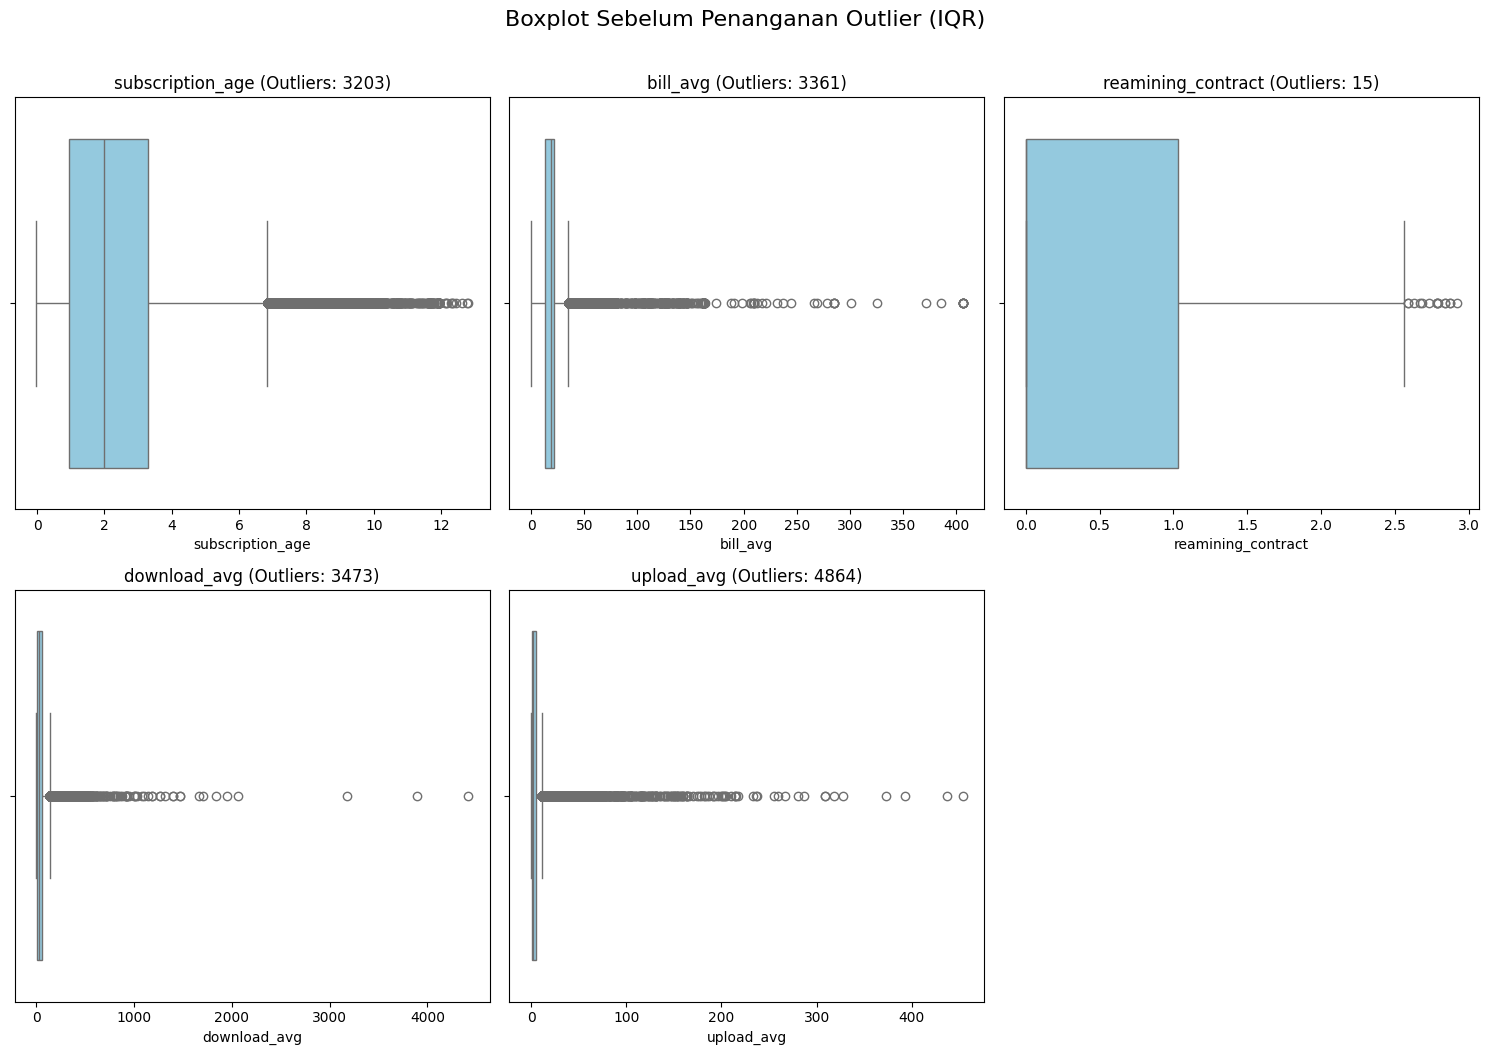

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'{col} (Outliers: {outlier_counts[col]})')
    plt.tight_layout()
plt.suptitle("Boxplot Sebelum Penanganan Outlier (IQR)", fontsize=16, y=1.05)
plt.show()

In [163]:
df[outlier_counts[outlier_counts > 0].index].describe().T

,count,mean,std,min,25%,50%,75%,max
subscription_age,71893.0,2.455486,2.026856,-0.02,0.94,1.98,3.30,12.80
bill_avg,71893.0,19.016844,13.188541,0.00,13.00,19.00,22.00,406.00
reamining_contract,71893.0,0.497612,0.665755,0.00,0.00,0.00,1.03,2.92
download_avg,71893.0,43.689911,63.405963,0.00,6.70,27.80,60.50,4415.20
upload_avg,71893.0,4.192076,9.818896,0.00,0.50,2.10,4.80,453.30


In [164]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower, upper=upper)

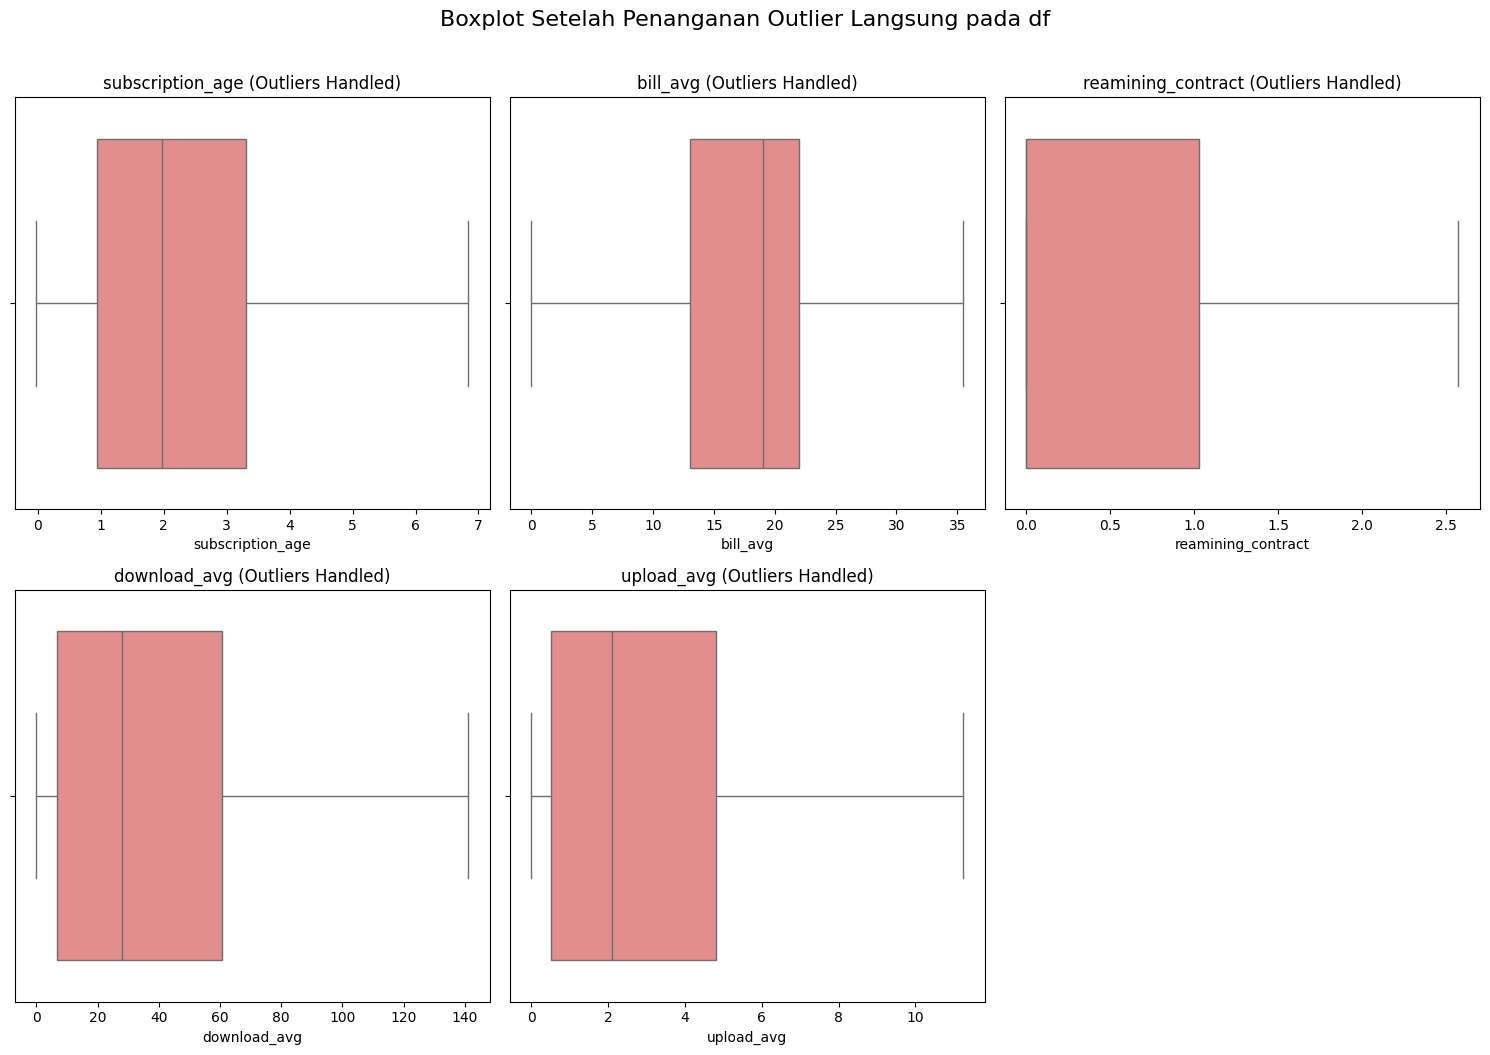

In [165]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'{col} (Outliers Handled)')
    plt.tight_layout()
plt.suptitle("Boxplot Setelah Penanganan Outlier Langsung pada df", fontsize=16, y=1.05)
plt.show()

In [166]:
df[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
subscription_age,71893.0,2.404109,1.879504,-0.02,0.94,1.98,3.30,6.840
bill_avg,71893.0,18.093451,8.290427,0.00,13.00,19.00,22.00,35.500
reamining_contract,71893.0,0.497574,0.665630,0.00,0.00,0.00,1.03,2.575
download_avg,71893.0,39.959870,40.299303,0.00,6.70,27.80,60.50,141.200
upload_avg,71893.0,3.236150,3.375571,0.00,0.50,2.10,4.80,11.250


In [167]:
df.head()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn,is_contract
0,1,0,6.84,25.0,0.14,0,8.4,2.3,0,0,1
1,0,0,6.84,0.0,0.00,0,0.0,0.0,0,1,0
2,1,0,6.84,16.0,0.00,0,13.7,0.9,0,1,0
3,0,0,6.84,21.0,0.00,1,0.0,0.0,0,1,0
4,0,0,6.39,0.0,0.00,0,0.0,0.0,0,1,0


In [168]:
# df.rename(columns={'reamining_contract': 'remaining_contract'}, inplace=True)
# df.head()

In [169]:
df.to_csv('cleaned_dataset.csv', index=False)

In [170]:
df_scaled = df.copy()

In [171]:
df_scaled.isnull().sum()

is_tv_subscriber               0
is_movie_package_subscriber    0
subscription_age               0
bill_avg                       0
reamining_contract             0
service_failure_count          0
download_avg                   0
upload_avg                     0
download_over_limit            0
churn                          0
is_contract                    0
dtype: int64

In [172]:
from sklearn.preprocessing import StandardScaler

target = df_scaled['churn']

features = df_scaled.drop('churn', axis=1)

scaler = StandardScaler()

features_scaled = pd.DataFrame(
    scaler.fit_transform(features),
    columns=features.columns,
    index=features.index
)

df_scaled = pd.concat([features_scaled, target], axis=1)

# Opsional: Cek jika masih ada NaN
print("Jumlah missing value setelah scaling:", df_scaled.isnull().sum().sum())

df_scaled.head(3)

Jumlah missing value setelah scaling: 0


,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,is_contract,churn
0,0.476083,-0.708273,2.360155,0.833081,-0.537201,-0.336792,-0.783142,-0.277333,-0.208788,1.055345,0
1,-2.100476,-0.708273,2.360155,-2.182466,-0.747530,-0.336792,-0.991584,-0.958704,-0.208788,-0.947557,1
2,0.476083,-0.708273,2.360155,-0.252516,-0.747530,-0.336792,-0.651625,-0.692080,-0.208788,-0.947557,1


In [173]:
print("Unique values for 'is_tv_subscriber':", df_scaled['is_tv_subscriber'].unique())
print("Unique values for 'is_movie_package_subscriber':", df_scaled['is_movie_package_subscriber'].unique())
print("Unique values for 'is_contract':", df_scaled['is_contract'].unique())

Unique values for 'is_tv_subscriber': [ 0.47608257 -2.10047599]
Unique values for 'is_movie_package_subscriber': [-0.70827261  1.41188573]
Unique values for 'is_contract': [ 1.05534543 -0.94755705]


In [174]:
df_scaled.head(3).to_excel('df_scaled_head3.xlsx', index=False)